# Gene signature scoring with pyUCell

In single-cell RNA-seq analysis, gene signature (or “module”) scoring constitutes a simple yet powerful approach to evaluate the strength of biological signals – typically associated to a specific cell type or biological process – in a transcriptome.

pyUCell is a package for evaluating gene signatures in single-cell datasets. pyUCell signature scores, based on the Mann-Whitney U statistic, are robust to dataset size and heterogeneity, and their calculation demands less computing time and memory than other available methods, enabling the processing of large datasets in a few minutes even on machines with limited computing power.

For installation instructions, refer to the README.

## Prepare data and signatures

In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import pyucell as uc

To run pyUCell, you will need two things: 1. a single-cell data object in AnnData format, and 2. a list of gene signatures.

First, load a test dataset:

In [4]:
adata = sc.datasets.pbmc3k()

Define two simple signatures to test

In [5]:
signatures = {
    "Tcell": ["CD3D", "CD3E", "CD2"],
    "Bcell": ["MS4A1", "CD79A", "CD79B"]
}

## Run pyUCell

Now we can score these gene signatures using pyUCell:

In [7]:
uc.compute_ucell_scores(adata, signatures=signatures, chunk_size=500)

The results are stored in adata.obs as a matrix of cell-wise scores:

In [9]:
adata.obs

,Tcell_UCell,Bcell_UCell
index,,
AAACATACAACCAC-1,0.599688,0.000000
AAACATTGAGCTAC-1,0.000000,0.856030
AAACATTGATCAGC-1,0.902982,0.000000
AAACCGTGCTTCCG-1,0.191366,0.000000
AAACCGTGTATGCG-1,0.000000,0.000000
...,...,...
TTTCGAACTCTCAT-1,0.000000,0.000000
TTTCTACTGAGGCA-1,0.000000,0.626391
TTTCTACTTCCTCG-1,0.000000,0.802403


## Visualize results on UMAP

In [10]:
# Normalize total counts per cell
sc.pp.normalize_total(adata, target_sum=1e4)
# Log1p transform
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)  # optional scaling before PCA
sc.tl.pca(adata, svd_solver="arpack", n_comps=50)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/mass/.pyenv/versions/3.11.11/envs/scverse/lib/python3.11/site-packages/threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


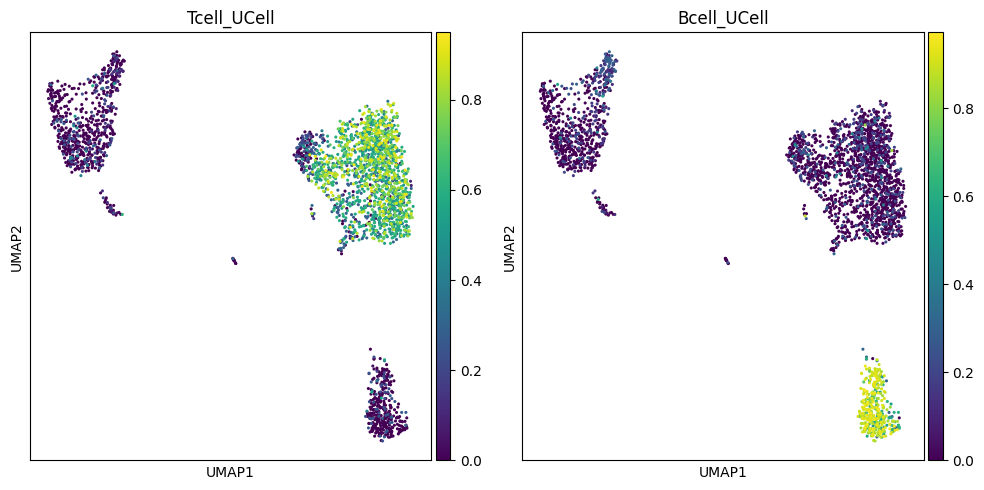

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sc.pl.umap(adata, color="Tcell_UCell", cmap="viridis", ax=axes[0], size=20, show=False)
sc.pl.umap(adata, color="Bcell_UCell", cmap="viridis", ax=axes[1], size=20, show=False)
plt.tight_layout()
plt.show()

## Additional resources

For more advanced use cases and a discussion of the parameters available, refer to [this tutorial](https://pyucell.readthedocs.io/en/latest/notebooks/parameters.html)

An implementation of the UCell algorithm for R is available at [Bioconductor](https://bioconductor.org/packages/UCell/) and on [GitHub](https://github.com/carmonalab/UCell).

## References

If you used UCell in your research, please cite:

**UCell: robust and scalable single-cell gene signature scoring.** Massimo Andreatta & Santiago J Carmona (2021) CSBJ [https://doi.org/10.1016/j.csbj.2021.06.043](https://doi.org/10.1016/j.csbj.2021.06.043)